In [1]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

--2022-12-11 23:23:24--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2022-12-11 23:23:24--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  86.7MB/s    in 41s     

2022-12-11 23:24:05 (81.5 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]



In [2]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_mild.zip

--2022-12-11 23:24:05--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_mild.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_mild.zip [following]
--2022-12-11 23:24:05--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_mild.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275693358 (263M) [application/zip]
Saving to: ‘DIV2K_train_LR_mild.zip’

DIV2K_train_LR_mild 100%[===================>] 262.92M  94.4MB/s    in 2.8s    

2022-12-11 23:24:08 (94.4 MB/s) - ‘DIV2K_train_LR_mild.zip’ saved [275693358/275693358]



In [ ]:
!unzip DIV2K_train_HR.zip

In [ ]:
!unzip DIV2K_train_LR_mild.zip

In [ ]:
!pip install pytorch_lightning

In [6]:
from __future__ import print_function, division
from torch.utils.data import Dataset
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import pytorch_lightning as pl
## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

from sklearn.model_selection import train_test_split


## Standard libraries
import os
import json
import math
import numpy as np 
import random

## Imports for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()

In [7]:
import glob 
hr_images = glob.glob("/content/DIV2K_train_HR" + '/*.png') #returns path of images
print(len(hr_images)) #contains 13243 images

lr_images = glob.glob("/content/DIV2K_train_LR_mild" + '/*.png') #returns path of images
print(len(lr_images))

800
800


In [8]:
class FacesDataset(Dataset):
    def __init__(self, path, transform=None):
        #self.img_dir = path
        self.transform = transform
        self.image_path = path
        self.hr_transform = transforms.Compose(
        [
            transforms.Resize((256, 256)), 
            transforms.ToTensor(), # converts a 255 image to 0-1
        ])
        
        self.lr_transform = transforms.Compose(
        [
            transforms.Resize((256//4, 256//4)), 
            transforms.Resize((256, 256), Image.BICUBIC), 
            transforms.ToTensor()
            
            
        ])
        
    def __len__(self):
        return len(self.image_path)
    
    def __getitem__(self,idx):
        image_hr = Image.open(self.image_path[idx][0])
        image_lr = Image.open(self.image_path[idx][1])

        image_lr = self.lr_transform(image_lr)
        image_hr = self.hr_transform(image_hr)
        
        return {"lr": image_lr, "hr": image_hr}
    
        
        
        

In [9]:
batch_size = 8

In [10]:
train_paths, test_paths = train_test_split(sorted(zip(sorted(hr_images),sorted(lr_images))), test_size=0.02, random_state=42)

train_dataloader = DataLoader(FacesDataset(train_paths), batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(FacesDataset(test_paths), batch_size=1)

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [11]:
t = next(iter(train_dataloader))

In [12]:
t = t['lr']

In [13]:
t[0].shape

torch.Size([3, 256, 256])

In [14]:
from __future__ import print_function, division
from torch.utils.data import Dataset
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image
import pytorch_lightning as pl
## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

from sklearn.model_selection import train_test_split


## Standard libraries
import os
import json
import math
import numpy as np 
import random

## Imports for plotting
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()

In [15]:
# https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial8/Deep_Energy_Models.html
# Taken from the above link 

# This model structure is arbitrary. Basically just applying convolution to reduce the dimension from 128 to 1
# This we need to explore. 

import torch.nn as nn
import torch.nn.functional as F
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


class CNNModel(nn.Module):

    def __init__(self, hidden_features=128, out_dim=1, **kwargs):
        super().__init__()
        # We increase the hidden dimension over layers. Here pre-calculated for simplicity.
        c_hid1 = hidden_features//2
        c_hid2 = hidden_features
        c_hid3 = hidden_features*2
        
        # Series of convolutions and Swish activation functions
        self.cnn_layers = nn.Sequential(
                nn.Conv2d(3, c_hid1, kernel_size=8, stride=2), 
                nn.MaxPool2d(7, stride=2),  
                Swish(),
            
                nn.Conv2d(c_hid1, c_hid2, kernel_size=6, stride=2),
                nn.MaxPool2d(6, stride=2),  
                Swish(),
            
                nn.Conv2d(c_hid2, c_hid3, kernel_size=6, stride=2), 
                Swish(),

                nn.Conv2d(c_hid3, c_hid3, kernel_size=4, stride=2),  
                Swish(),

                nn.Flatten(),
                nn.Linear(256, out_dim)
        )

    def forward(self, x):
        x = self.cnn_layers(x).squeeze(dim=-1)
        return x

In [16]:
model = CNNModel()

inp = torch.Tensor(1,3,256,256)
inp.shape

torch.Size([1, 3, 256, 256])

In [17]:
out = model(inp)
out.shape

torch.Size([1])

In [18]:
class Sampler:
    def __init__(self, model, img_shape, sample_size, max_len=8192):
        """
        Inputs:
            model - Neural network to use for modeling E_theta
            img_shape - Shape of the images to model
            sample_size - Batch size of the samples
            max_len - Maximum number of data points to keep in the buffer
        """
        super().__init__()
        self.model = model
        self.img_shape = img_shape
        self.sample_size = sample_size
        self.max_len = max_len
        self.examples = [(torch.rand((1,)+img_shape)*2-1) for _ in range(self.sample_size)]

    def sample_new_exmps(self, lr_images, steps=60, step_size=10):
        """
        Function for getting a new batch of "fake" images.
        Inputs:
            steps - Number of iterations in the MCMC algorithm
            step_size - Learning rate nu in the algorithm above
        """
        # Choose 95% of the batch from the buffer, 5% generate from scratch
        #n_new = np.random.binomial(self.sample_size, 0.05)
        #rand_imgs = torch.rand((n_new,) + self.img_shape) * 2 - 1
        #old_imgs = torch.cat(random.choices(self.examples, k=self.sample_size-n_new), dim=0)
        #lr_images = torch.cat(random.choices(lr_images, k=self.sample_size-n_new), dim=0)
        #print('lr_Size = ', self.sample_size-n_new)
        #print('lr_image Shape', lr_images.shape)
        inp_imgs = lr_images.detach().to(device) #torch.cat([rand_imgs, lr_images], dim=0).detach().to(device)

        # Perform MCMC sampling
        inp_imgs = Sampler.generate_samples(self.model, inp_imgs, steps=steps, step_size=step_size)

        # Add new images to the buffer and remove old ones if needed
        self.examples = list(inp_imgs.to(torch.device("cpu")).chunk(self.sample_size, dim=0)) + self.examples
        self.examples = self.examples[:self.max_len]
        return inp_imgs

    @staticmethod
    def generate_samples(model, inp_imgs, steps=60, step_size=10, return_img_per_step=False):
        """
        Function for sampling images for a given model. 
        Inputs:
            model - Neural network to use for modeling E_theta
            inp_imgs - Images to start from for sampling. If you want to generate new images, enter noise between -1 and 1.
            steps - Number of iterations in the MCMC algorithm.
            step_size - Learning rate nu in the algorithm above
            return_img_per_step - If True, we return the sample at every iteration of the MCMC
        """
        # Before MCMC: set model parameters to "required_grad=False"
        # because we are only interested in the gradients of the input. 
        is_training = model.training
        model.eval()
        for p in model.parameters():
            p.requires_grad = False
        inp_imgs.requires_grad = True
        
        # Enable gradient calculation if not already the case
        had_gradients_enabled = torch.is_grad_enabled()
        torch.set_grad_enabled(True)
        
        # We use a buffer tensor in which we generate noise each loop iteration.
        # More efficient than creating a new tensor every iteration.
        noise = torch.randn(inp_imgs.shape, device=inp_imgs.device)
        
        # List for storing generations at each step (for later analysis)
        imgs_per_step = []
        
        # Loop over K (steps)
        for _ in range(steps):
            # Part 1: Add noise to the input.
            # noise.normal_(0, 0.005)
            # inp_imgs.data.add_(noise.data)
            # inp_imgs.data.clamp_(min=-1.0, max=1.0)
            
            # Part 2: calculate gradients for the current input.
            out_imgs = -model(inp_imgs)
            out_imgs.sum().backward()
            inp_imgs.grad.data.clamp_(-0.03, 0.03) # For stabilizing and preventing too high gradients

            # Apply gradients to our current samples
            inp_imgs.data.add_(-step_size * inp_imgs.grad.data)
            inp_imgs.grad.detach_()
            inp_imgs.grad.zero_()
            inp_imgs.data.clamp_(min=-1.0, max=1.0)
            
            if return_img_per_step:
                imgs_per_step.append(inp_imgs.clone().detach())
        
        # Reactivate gradients for parameters for training
        for p in model.parameters():
            p.requires_grad = True
        model.train(is_training)
        
        # Reset gradient calculation to setting before this function
        torch.set_grad_enabled(had_gradients_enabled)

        if return_img_per_step:
            return torch.stack(imgs_per_step, dim=0)
        else:
            return inp_imgs

In [19]:
class DeepEnergyModel(pl.LightningModule):
    
    def __init__(self, img_shape, batch_size, alpha=0.1, lr=1e-4, beta1=0.0, **CNN_args):
        super().__init__()
        self.save_hyperparameters()
        
        self.cnn = CNNModel()
        self.sampler = Sampler(self.cnn, img_shape=img_shape, sample_size=batch_size, max_len = 16)
        self.example_input_array = torch.zeros(3, *img_shape)
 
    def forward(self, x):
        z = self.cnn(x)
        return z

    def configure_optimizers(self):
        # Energy models can have issues with momentum as the loss surfaces changes with its parameters. 
        # Hence, we set it to 0 by default. 
        optimizer = optim.Adam(self.parameters(), lr=self.hparams.lr, betas=(self.hparams.beta1, 0.999))
        scheduler = optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.97) # Exponential decay over epochs
        return [optimizer], [scheduler]

    def training_step(self, batch, batch_idx):
        # We add minimal noise to the original images to prevent the model from focusing on purely "clean" inputs
        images_dict = batch
        hr_image = images_dict["hr"]
        lr_image = images_dict["lr"]
        
        small_noise = torch.randn_like(hr_image) * 0.005
        hr_image.add_(small_noise).clamp_(min=-1.0, max=1.0)
        
        # Obtain samples
        fake_imgs = self.sampler.sample_new_exmps(steps=60, lr_images = lr_image, step_size=10)

        # print('Shape of LR Images:', lr_image.shape)
        # print('Shape of HR Images: ', hr_image.shape)
        # print('Shape of Sampled Images', fake_imgs.shape)
        

       # Predict energy score for all images
        #inp_imgs = torch.cat([hr_image, lr_image], dim=0)
        inp_imgs = torch.cat([hr_image, fake_imgs], dim=0)
        real_out, fake_out = self.cnn(inp_imgs).chunk(2, dim=0)
        
        # Calculate losses
        reg_loss = self.hparams.alpha * (real_out ** 2 + fake_out ** 2).mean()
        cdiv_loss = fake_out.mean() - real_out.mean()
        loss = reg_loss + cdiv_loss
        
        # Logging
        self.log('loss', loss)
        self.log('loss_regularization', reg_loss)
        self.log('loss_contrastive_divergence', cdiv_loss)
        self.log('metrics_avg_real', real_out.mean())
        self.log('metrics_avg_fake', fake_out.mean())
        return loss

    def validation_step(self, batch, batch_idx):
        # For validating, we calculate the contrastive divergence between purely random images and unseen examples
        # Note that the validation/test step of energy-based models depends on what we are interested in the model
        
        images_dict = batch
        hr_image = images_dict["hr"]
        lr_image = images_dict["lr"]
        
#         real_imgs, _ = batch
#         fake_imgs = torch.rand_like(real_imgs) * 2 - 1
        
        inp_imgs = torch.cat([hr_image, lr_image], dim=0)
        real_out, fake_out = self.cnn(inp_imgs).chunk(2, dim=0)
        
        cdiv = fake_out.mean() - real_out.mean()
        self.log('val_contrastive_divergence', cdiv)
        self.log('val_fake_out', fake_out.mean())
        self.log('val_real_out', real_out.mean())

In [20]:
if torch.cuda.is_available():
  device = "cuda"
else:
  device="cpu"

In [21]:
def train_model(**kwargs):
    # Create a PyTorch Lightning trainer with the generation callback
    trainer = pl.Trainer(default_root_dir=os.path.join("/content/drive/MyDrive/EBM"),
                         gpus=1 if str(device).startswith("cuda") else 0,
                         max_epochs=15,
                         gradient_clip_val=0.1)
    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = "/content/gdrive/MyDrive/DL/Project/Model/EBM_CNN/CNN_EBM.ckpt"
    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        model = DeepEnergyModel.load_from_checkpoint(pretrained_filename)
    else:
        pl.seed_everything(42)
        model = DeepEnergyModel(**kwargs)
        trainer.fit(model, train_dataloader, test_dataloader)
        trainer.save_checkpoint("/content/gdrive/MyDrive/DL/Project/Model/EBM_CNN/CNN_EBM.ckpt")
        #model = DeepEnergyModel.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
    # No testing as we are more interested in other properties
    return model

In [22]:
test = next(iter(train_dataloader))
lr_test, hr_test = test['lr'], test['hr']


In [23]:
lr_test.shape

torch.Size([8, 3, 256, 256])

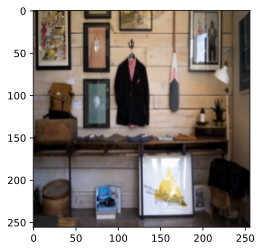

In [24]:
from matplotlib import pyplot as plt
plt.imshow(hr_test[2].permute(1,2,0).numpy())

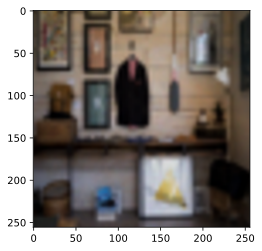

In [25]:
plt.imshow(lr_test[2].permute(1,2,0).numpy())

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [27]:
import time

start = time.time()
model = train_model(img_shape=(3,256,256), 
                    batch_size=train_dataloader.batch_size,
                    lr=1e-4,
                    beta1=0.0)
end = time.time()

print('Training Time: ', (end - start)/60, ' mins')

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Found pretrained model, loading...
Training Time:  0.05699648459752401  mins


In [28]:
class GenerateCallback(pl.Callback):

    def __init__(self, batch_size=8, vis_steps=8, num_steps=256, every_n_epochs=5):
        super().__init__()
        self.batch_size = batch_size         # Number of images to generate
        self.vis_steps = vis_steps           # Number of steps within generation to visualize
        self.num_steps = num_steps           # Number of steps to take during generation
        self.every_n_epochs = every_n_epochs # Only save those images every N epochs (otherwise tensorboard gets quite large)

    def on_epoch_end(self, trainer, pl_module):
        # Skip for all other epochs
        if trainer.current_epoch % self.every_n_epochs == 0:
            # Generate images
            imgs_per_step = self.generate_imgs(pl_module)
            # Plot and add to tensorboard
            for i in range(imgs_per_step.shape[1]):
                step_size = self.num_steps // self.vis_steps
                imgs_to_plot = imgs_per_step[step_size-1::step_size,i]
                grid = torchvision.utils.make_grid(imgs_to_plot, nrow=imgs_to_plot.shape[0], normalize=True, range=(-1,1))
                trainer.logger.experiment.add_image(f"generation_{i}", grid, global_step=trainer.current_epoch)
                
    def generate_imgs(self, pl_module, start_images):
        pl_module.eval()
        #start_imgs = torch.rand((self.batch_size,) + pl_module.hparams["img_shape"]).to(pl_module.device)
        #start_imgs = start_imgs * 2 - 1
        start_imgs = start_images
        torch.set_grad_enabled(True)  # Tracking gradients for sampling necessary
        imgs_per_step = Sampler.generate_samples(pl_module.cnn, start_imgs, steps=self.num_steps, step_size=10, return_img_per_step=True)
        torch.set_grad_enabled(False)
        pl_module.train()
        return imgs_per_step

In [29]:
model.to(device)
pl.seed_everything(43)
callback = GenerateCallback(batch_size=4, vis_steps=8, num_steps=32)
test = next(iter(train_dataloader))

lr_test, hr_test = test['lr'], test['hr']

imgs_per_step = callback.generate_imgs(model, lr_test.to(device))
imgs_per_step = imgs_per_step.cpu()

INFO:lightning_lite.utilities.seed:Global seed set to 43


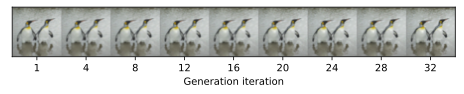

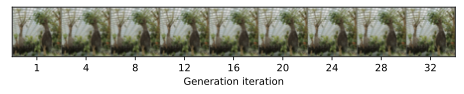

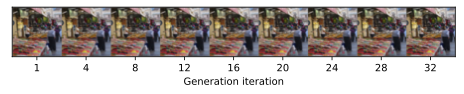

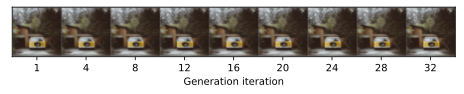

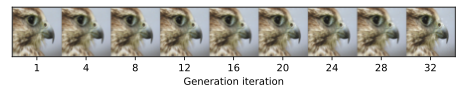

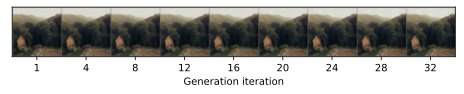

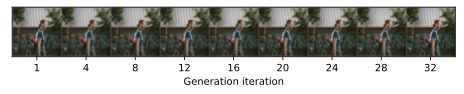

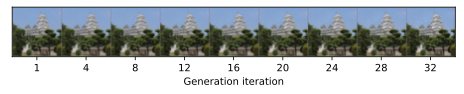

In [30]:
for i in range(imgs_per_step.shape[1]):
    step_size = callback.num_steps // callback.vis_steps
    imgs_to_plot = imgs_per_step[step_size-1::step_size,i]
    imgs_to_plot = torch.cat([imgs_per_step[0:1,i],imgs_to_plot], dim=0)
    grid = torchvision.utils.make_grid(imgs_to_plot, nrow=imgs_to_plot.shape[0], normalize=True, range=(-1,1), pad_value=0.5, padding=2)
    grid = grid.permute(1, 2, 0)
    plt.figure(figsize=(8,8))
    plt.imshow(grid)
    plt.xlabel("Generation iteration")
    plt.xticks([(imgs_per_step.shape[-1]+2)*(0.5+j) for j in range(callback.vis_steps+1)], 
               labels=[1] + list(range(step_size,imgs_per_step.shape[0]+1,step_size)))
    plt.yticks([])
    plt.show()

In [31]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity


In [32]:
a = hr_test[0]
a = a.permute(1,2,0)
a.shape

b = lr_test[0]
b = b.permute(1,2,0)
b.shape

torch.Size([256, 256, 3])

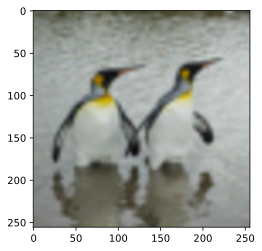

In [33]:
from matplotlib import pyplot as plt
plt.imshow(b.numpy())

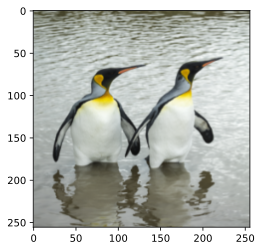

In [34]:
plt.imshow(a.numpy())

In [35]:
peak_signal_noise_ratio(a.numpy(),b.numpy())

18.506275055157072

In [36]:
imgs_per_step.shape

torch.Size([32, 8, 3, 256, 256])

In [37]:
img1 = imgs_per_step[31]
img1.shape

torch.Size([8, 3, 256, 256])

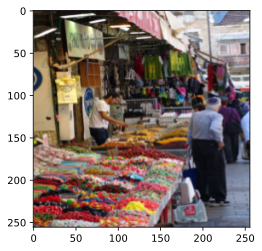

In [38]:
plt.imshow(hr_test[2].permute(1,2,0).numpy())

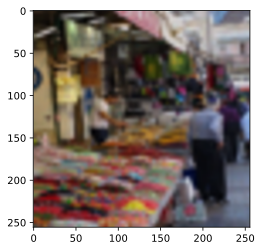

In [39]:
plt.imshow(lr_test[2].permute(1,2,0).numpy())

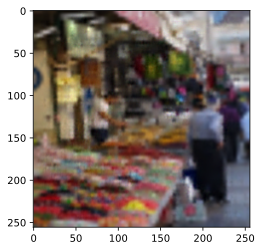

In [40]:
x = img1[2].permute(1,2,0)
plt.imshow(x.numpy())

In [41]:
peak_signal_noise_ratio(hr_test[2].permute(1,2,0).numpy(), x.numpy())

18.627794814560282

In [42]:
peak_signal_noise_ratio(hr_test[2].permute(1,2,0).numpy(),lr_test[2].permute(1,2,0).numpy())

18.314269121295293

In [43]:
structural_similarity(hr_test[2].permute(1,2,0).numpy(),lr_test[2].permute(1,2,0).numpy(),multichannel=True)

0.6054363080459823

In [44]:
structural_similarity(hr_test[2].permute(1,2,0).numpy(),x.numpy(),multichannel=True)

0.6274313282245623

##Analysis and Metrics

Let us generate the images using our model for the test dataset and then calculate the metrics PSNR and SSIM

In [45]:
def generate_images_test(test_dataloader):
  model.to(device)
  pl.seed_everything(43)
  callback = GenerateCallback(batch_size=4, vis_steps=8, num_steps=32)
  gen_imgs = []
  for it in test_dataloader:
    lr_test, hr_test = it['lr'], it['hr']
    imgs_per_step = callback.generate_imgs(model, lr_test.to(device))
    imgs_per_step = imgs_per_step.cpu()
    gen = imgs_per_step[-1]
    gen_imgs.append(gen)

  return gen_imgs

In [46]:
def get_metrics(test_dataloader, test_gen_imgs):

  avg_psnr = 0
  avg_ssim = 0
  avg_psnr_lr = 0
  avg_ssim_lr = 0
  count = 0
  
  for ind, it in enumerate(test_dataloader):
    lr_test, hr_test = it['lr'], it['hr']
    gen = test_gen_imgs[ind]

    psnr = 0
    ssim = 0
    psnr_lr = 0
    ssim_lr = 0
    
    for i, im in enumerate(hr_test):
      psnr = psnr + peak_signal_noise_ratio(hr_test[i].permute(1,2,0).numpy(),gen[i].permute(1,2,0).numpy())  
      psnr_lr = psnr_lr + peak_signal_noise_ratio(hr_test[i].permute(1,2,0).numpy(),lr_test[i].permute(1,2,0).numpy())
      ssim = ssim + structural_similarity(hr_test[i].permute(1,2,0).numpy(),gen[i].permute(1,2,0).numpy(), multichannel=True)
      ssim_lr = ssim_lr + structural_similarity(hr_test[i].permute(1,2,0).numpy(),lr_test[i].permute(1,2,0).numpy(), multichannel=True)
      count = count + 1

    avg_psnr = avg_psnr + (psnr) 
    avg_psnr_lr = avg_psnr_lr + (psnr_lr) 
    avg_ssim = avg_ssim + (ssim) 
    avg_ssim_lr = avg_ssim_lr + (ssim_lr) #/hr_test.shape[0])

  return avg_psnr/count, avg_psnr_lr/count, avg_ssim/count, avg_ssim_lr/count #/len(test_dataloader)


In [47]:
def compare_imgs(test_dataloader, test_gen_imgs):
  for i, it in enumerate(test_dataloader):
    lr, hr = it['lr'], it['hr']
    gen = test_gen_imgs[i]
    fig = plt.figure(figsize=(10, 7))
    fig.add_subplot(1,3,1)
    plt.title('High Res')
    plt.imshow(hr[0].permute(1,2,0).numpy())
    fig.add_subplot(1,3,2)
    plt.title('Low Res')
    plt.imshow(lr[0].permute(1,2,0).numpy())
    fig.add_subplot(1,3,3)
    plt.title('EBM CNN Generated Image')
    plt.imshow(gen[0].permute(1,2,0).numpy())


Let us check the Metrics

In [48]:
test_gen_imgs = generate_images_test(test_dataloader)
psnr, psnr_lr, ssim, ssim_lr = get_metrics(test_dataloader, test_gen_imgs)

INFO:lightning_lite.utilities.seed:Global seed set to 43


In [49]:
print('Average PSNR - LR images:%.4f and Generated images:%.4f'%(psnr_lr,psnr))
print('Average SSIM - LR images:%.4f and Generated images:%.4f'%(ssim_lr,ssim))

Average PSNR - LR images:20.3058 and Generated images:20.6214
Average SSIM - LR images:0.7325 and Generated images:0.7294


Let us compare some of the images by an eyeball check

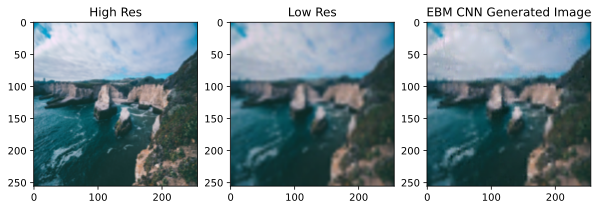

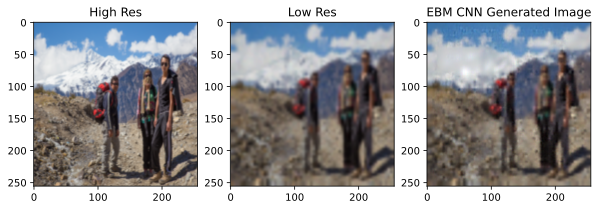

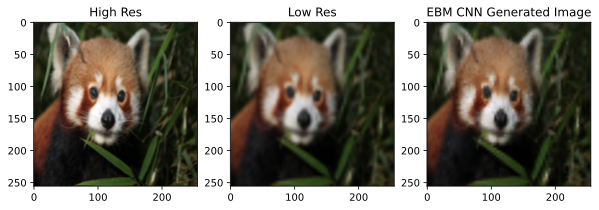

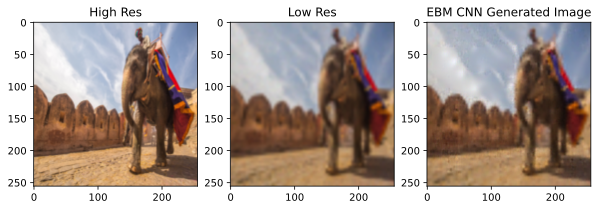

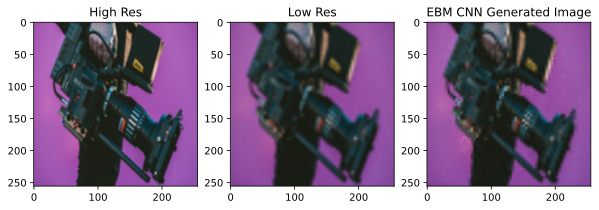

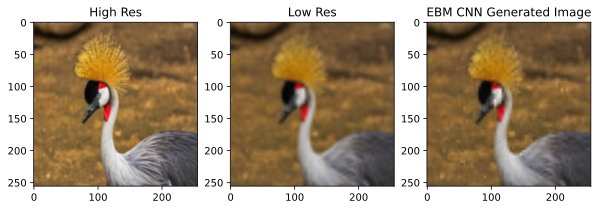

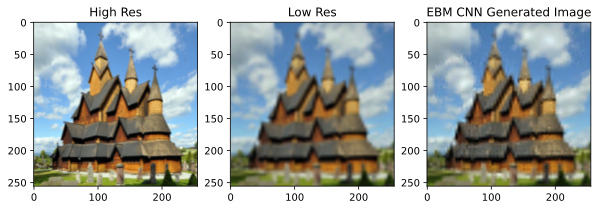

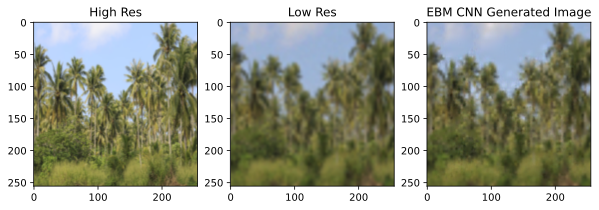

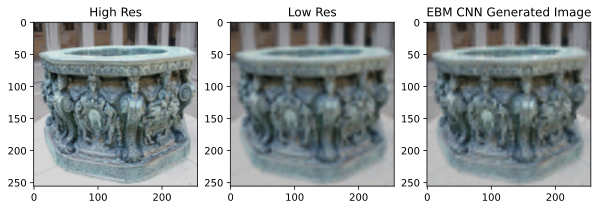

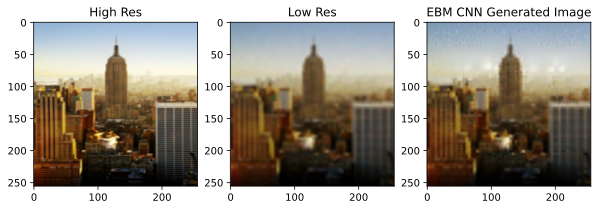

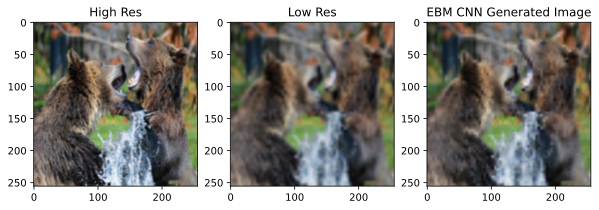

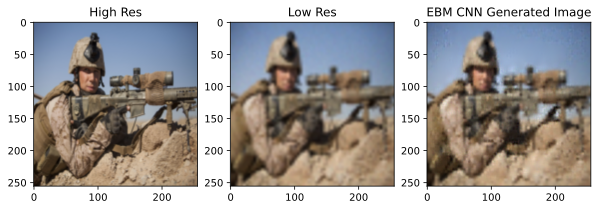

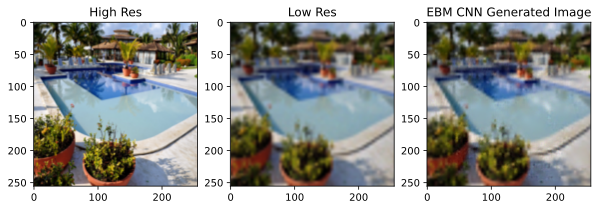

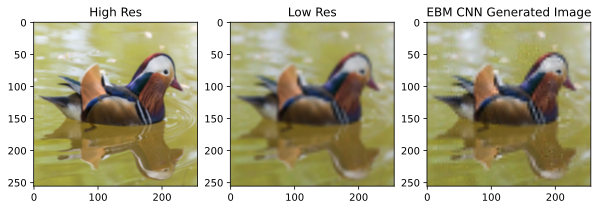

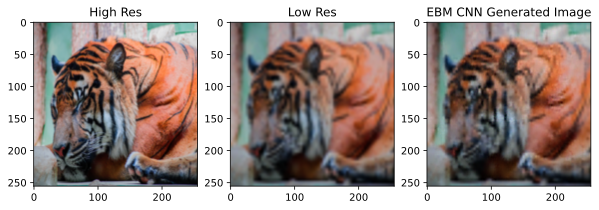

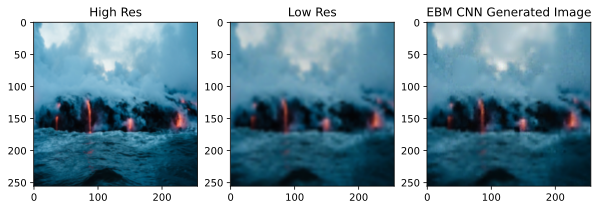

In [50]:
compare_imgs(test_dataloader, test_gen_imgs)

I feel the following images are the best for the report (descending order of priority)(using 1-indexing):<br>
1) Image 3 (Red Panda)<br>
2) Image 7 (Heddal Stave Church)<br>
3) Image 12 (Military)<br>
4) Image 15 (Tiger)<br>
5) Image 13 (Pool)